# C. Elegans Data 

#### This notebook goes through an example from the talk of **Phil Kidd's** C. Elegans data, ultimately showing how `fastplotlib` can be used as a tool for examining behavioral data

In [1]:
import fastplotlib as fpl
import numpy as np
import pickle
from ipywidgets import HBox, VBox

Detected skylake derivative running on mesa i915. Clears to srgb textures will use manual shader clears.
Detected skylake derivative running on mesa i915. Clears to srgb textures will use manual shader clears.
Detected skylake derivative running on mesa i915. Clears to srgb textures will use manual shader clears.


Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01,\x00\x00\x007\x08\x06\x00\x00\x00\xb6\x1bw\x99\x…

Valid,Device,Type,Backend,Driver
✅,Intel(R) Arc(tm) Graphics (MTL),IntegratedGPU,Vulkan,Mesa 24.3.2
✅ (default),NVIDIA GeForce RTX 4060 Laptop GPU,DiscreteGPU,Vulkan,565.77
❗ limited,"llvmpipe (LLVM 19.1.5, 256 bits)",CPU,Vulkan,Mesa 24.3.2 (LLVM 19.1.5)
❌,Mesa Intel(R) Arc(tm) Graphics (MTL),IntegratedGPU,OpenGL,4.6 (Core Profile) Mesa 24.3.2


Detected skylake derivative running on mesa i915. Clears to srgb textures will use manual shader clears.
Detected skylake derivative running on mesa i915. Clears to srgb textures will use manual shader clears.


## Load the data

Dataset contains three worm tracks stored in a dictionary with keys "0", "1", and "2". Within each track data respective to each work including the raw images, positions, angular velocity etc.

In [2]:
with open('demodata', 'rb') as f:
    data = pickle.load(f)
data.keys()

dict_keys([0, 1, 2])

In [9]:
worm_viewer = fpl.ImageWidget(data=[np.array(data[0]["images"]), np.array(data[1]["images"]), np.array(data[2]["images"])], cmap="gray", figure_kwargs={"size": (700, 560)})
worm_viewer.show()

ValueError: Two arrays differ along dimension t

## Let's look at an individual track

In [3]:
track = data[0]

RFBOutputContext()

Detected skylake derivative running on mesa i915. Clears to srgb textures will use manual shader clears.
/home/clewis/venvs/rockefeller/lib64/python3.11/site-packages/fastplotlib/graphics/_features/_base.py:18: UserWarning: casting float64 array to float32
  warn(f"casting {array.dtype} array to float32")


JupyterRenderCanvas(css_height='560.0px', css_width='700.0px')
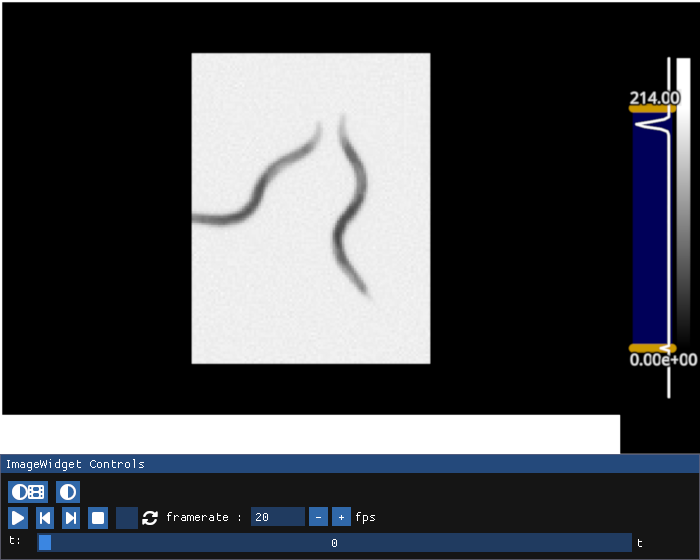

In [4]:
# view the raw images 
worm_viewer = fpl.ImageWidget(data=np.array(track["images"]), cmap="gray", figure_kwargs={"size": (700, 560)})
worm_viewer.show()

## View corresponding behavior

In [27]:
track_fig = fpl.Figure(names=[["Worm track"]],size=(900,700))

RFBOutputContext()

### Define a predetermined code for the behavioral ethogram

In [28]:
# color code for ethogram
color_dict = {'forward run':'r','short turn':'b','forward curving':'g','omega':'k','pause':'y','reversal':'m','prereversal':'c','unclassified':'gray'}

### Define colors using `color_dict`

In [29]:
# gives us a color for every datapoint, can then apply as a colormap to our line
colors = [color_dict[bhv] for bhv in track['behaviors2']]
colors[:10]

['gray', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y']

### Plot the xy position of the work over time

In [30]:
track_graphic = track_fig[0, 0].add_line(np.column_stack([track['xsc'], track['ysc']]),colors=colors)

#### Add a point to track the position over time

In [31]:
point = track_fig[0, 0].add_scatter(np.column_stack([track['xsc'][0], track['ysc'][0]]))
point.sizes = 10
point.colors = 'w'

### Plot the concentrations

In [32]:
data_fig = fpl.Figure(names=[["Concentration plot"]], size=(600, 300))
data_graphic = data_fig[0, 0].add_line(np.column_stack([np.array(track['times']), np.array(track["xsc"])]),colors=colors)

RFBOutputContext()

In [33]:
# add a linear selector
selector = data_graphic.add_linear_selector()

### Add an event handler to update the data

In [34]:
def change_point(ev):
    global point
    global selector
    ix = ev['t']
    # update the xy position of the point 
    point.data = np.array([track['xsc'][ix], track['ysc'][ix], 0])
    # update the selection of the linear selector
    selector.selection = track['times'][ix]

In [35]:
worm_viewer.add_event_handler(change_point)

## View the plots

In [36]:
HBox([VBox([track_fig.show(), data_fig.show(maintain_aspect=False)]), worm_viewer.show()])